In [ ]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression as LR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip install statsmodels==0.13.2
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 9.8 MB 34.2 MB/s 
     |████████████████████████████████| 233 kB 68.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
urldemo="https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv"
urlrepub = "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv"
urlallcandidate = "https://www.fec.gov/files/bulk-downloads/2018/candidate_summary_2018.csv"
urlexpenditures = "https://www.fec.gov/files/bulk-downloads/2018/independent_expenditure_2018.csv"
democrats = pd.read_csv(urldemo)
republicans = pd.read_csv(urlrepub,encoding='latin-1')
all_candidates = pd.read_csv(urlallcandidate)
expenditure_1718 = pd.read_csv(urlexpenditures)

# Data Overview

<ins>all_candidates.csv</ins>:<br>
The candidate summary file contains summary financial information about each candidate registered with the FEC or appearing on an official state ballot for House, Senate or President. This information is available for the current election and for historical elections starting with the 2008 election. Special elections for House and Senate are also included.

Committees provide a summary of their financial activity in each filing. These summaries are combined for the full two year period to create the candidate summary file. A candidate’s financial totals include their principal campaign committee and other committees authorized to raise money on their behalf. The totals cover from January 1 of the year before the election through the most recent report submitted by the committees.

<ins>democrats.csv</ins>:<br>
contains information about the 811 candidates who have appeared on the ballot this year in Democratic primaries for Senate, House, and governor, not counting races featuring a Democratic incumbent, as of August 7, 2018.

<ins>expenditures.csv</ins>:<br>
The independent expenditures file contains detailed information about independent expenditures. These are spending by individual people, groups, political committees, corporations or unions expressly advocating the election or defeat of a clearly identified federal candidate. These expenditures may not be made in concert or cooperation with or at the request or suggestion of a candidate, the candidate’s campaign or a political party.




# Research Question

Does spending more on campaign operation (Net Operating Expenditure) helps candidates (Republicans and Democrats) win the primary election? <br> 


# Exploratory Data Analysis (EDA)

In [ ]:
all_candidates

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,"ASHBY, KEN",H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,"ECKHART, DON ELIJAH",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,"ZIESING, MICHAEL VINCENT",S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,"SIRES, ALBIO",H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.00,0.0,500.0,500.00,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,"SMITH, DOUGLAS MARK MR. JR.",H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.00,0.0,0.0,0.00,0.00,0.00,3873.60,3873.60,0.0,01/01/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,https://www.fec.gov/data/candidate/S8PA00254/?...,"KERNS JR, DALE RONALD",S8PA00254,S,PA,0.0,LIB,CHALLENGER,214702.58,202162.62,...,0.00,0.0,0.0,0.00,0.00,191400.62,191926.62,0.00,0.0,11/16/2016
3791,https://www.fec.gov/data/candidate/S2NV00183/?...,"HELLER, DEAN",S2NV00183,S,NV,0.0,REP,INCUMBENT,12888327.96,14089975.47,...,254586.11,0.0,30850.0,285436.11,39577.42,11863772.89,13711842.62,1366283.00,0.0,01/01/2017
3792,https://www.fec.gov/data/candidate/H2MI11133/?...,"BENTIVOLIO, KERRY",H2MI11133,H,MI,11.0,REP,OPEN,37273.54,34656.38,...,0.00,0.0,0.0,0.00,3933.62,35223.54,30722.76,0.00,0.0,10/01/2017
3793,https://www.fec.gov/data/candidate/H4GA12051/?...,"YU, EUGENE MR.",H4GA12051,H,GA,12.0,REP,CHALLENGER,65980.00,23716.15,...,0.00,0.0,0.0,0.00,0.00,32980.00,23716.15,0.00,0.0,07/01/2016


In [ ]:
republicans

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
democrats

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,WV,U.S. House West Virginia District 2,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-35.330002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
807,Janice Hagerman,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
808,Paul Davis,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
809,Richard Ojeda,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-47.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN


In [ ]:
candidates = all_candidates[['Cand_Name', 'Cand_Office', 'Cand_Party_Affiliation', 'Cand_Incumbent_Challenger_Open_Seat', 'Total_Receipt', 'Net_Contribution', 'Net_Operating_Expenditure']]
candidates

,Cand_Name,Cand_Office,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Net_Contribution,Net_Operating_Expenditure
0,"ASHBY, KEN",H,LIB,CHALLENGER,0.00,0.00,0.00
1,"ECKHART, DON ELIJAH",S,REP,CHALLENGER,0.00,0.00,0.00
2,"ZIESING, MICHAEL VINCENT",S,GRE,CHALLENGER,0.00,0.00,0.00
3,"SIRES, ALBIO",H,DEM,INCUMBENT,460108.57,459357.05,437542.51
4,"SMITH, DOUGLAS MARK MR. JR.",H,IND,CHALLENGER,0.00,0.00,3873.60
...,...,...,...,...,...,...,...
3790,"KERNS JR, DALE RONALD",S,LIB,CHALLENGER,214702.58,191400.62,191926.62
3791,"HELLER, DEAN",S,REP,INCUMBENT,12888327.96,11863772.89,13711842.62
3792,"BENTIVOLIO, KERRY",H,REP,OPEN,37273.54,35223.54,30722.76
3793,"YU, EUGENE MR.",H,REP,CHALLENGER,65980.00,32980.00,23716.15


In [ ]:
ci_republicans = republicans[['Candidate', 'Won Primary', 'Rep Party Support?']]
ci_republicans.rename(columns={'Rep Party Support?': 'Party Support?'}, inplace=True)
ci_democrats = democrats[['Candidate', 'Won Primary', 'Party Support?']]
ci = pd.concat([ci_republicans, ci_democrats], axis=0)
ci

,Candidate,Won Primary,Party Support?
0,Mike Dunleavy,Yes,NaN
1,Michael Sheldon,No,NaN
2,Mead Treadwell,No,NaN
3,Darin Colbry,No,NaN
4,Thomas Gordon,No,NaN
...,...,...,...
806,Talley Sergent,Yes,NaN
807,Janice Hagerman,No,NaN
808,Paul Davis,No,NaN
809,Richard Ojeda,Yes,NaN


In [ ]:
expenditure_1718

,cand_id,cand_name,spe_id,spe_nam,ele_type,can_office_state,can_office_dis,can_office,cand_pty_aff,exp_amo,...,pur,pay,file_num,amndt_ind,tran_id,image_num,receipt_dat,fec_election_yr,prev_file_num,dissem_dt
0,H8NY22151,"Brindisi, Anthony",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,22.0,H,DEMOCRATIC PARTY,116500.00,...,Television Advertising,SKDKnickerbocker,1279347,N,WFT20189231912-1,201810239130815985,23-OCT-18,2018,NaN,22-OCT-18
1,H8NY22151,"Brindisi, Anthony",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,22.0,H,DEMOCRATIC PARTY,61120.00,...,Radio advertising,SKDKnickerbocker,1279347,N,WFT20189231915-1,201810239130815986,23-OCT-18,2018,NaN,22-OCT-18
2,H8NY22151,"Brindisi, Anthony",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,22.0,H,DEMOCRATIC PARTY,28043.00,...,Direct mail,SKDKnickerbocker,1289385,N,WFT20181022223-1,201811029133585219,02-NOV-18,2018,NaN,01-NOV-18
3,H8NY22151,"Brindisi, Anthony",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,22.0,H,DEMOCRATIC PARTY,28043.00,...,Direct mail,SKDKnickerbocker,1287145,N,WFT20189302022-1,201810309133561552,30-OCT-18,2018,NaN,29-OCT-18
4,H8NY22151,"Brindisi, Anthony",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,22.0,H,DEMOCRATIC PARTY,28043.00,...,Direct mail,SKDKnickerbocker,1279347,N,WFT20189231920-1,201810239130815988,23-OCT-18,2018,NaN,22-OCT-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45034,NaN,"ROSKAM, PETER",C90018094,NaN,G,IL,6T,H,NaN,587.40,...,YARD SIGNS,NaN,1274211,N,F5710171860774,201810150300236077,17-OCT-18,2018,NaN,NaN
45035,NaN,"SINEMA,",C90018169,NaN,G,NaN,00,S,NaN,4096.04,...,PAYROLL,NaN,1291246,N,F5711131869661,201811070300246966,13-NOV-18,2018,NaN,NaN
45036,NaN,"STEWART, COREY",C90018508,NaN,G,VA,00,S,NaN,1104.00,...,PRINT MAIL AD,NaN,1290919,N,F5711081863892,201811050300246389,08-NOV-18,2018,NaN,NaN
45037,NaN,"TED, TED",C90018326,NaN,NaN,NaN,00,S,NaN,2946.00,...,NEWSPAPER AD,NaN,1287246,N,F57103018387718,201810260300243877,30-OCT-18,2018,NaN,NaN


## Data Cleaning 

In [ ]:
#find all the names in democrats that have special characters like () and ""
#These are the names with special character that need cleaning 

#clean democrats

#cleaning those names that have a paratheses in it
def no_paran(names):
    names = [re.sub(r'\([^)]*\)', "", name) for name in names]
    names = [name.rstrip() for name in names]
    return names

#cleaning the name that has a "" in it
def no_quot(names):
    names = [re.sub(r'\"[^)]*\"', "", name) for name in names]
    names = [re.sub(' +', ' ', name) for name in names]
    return names

#cleaning the name that has "Jr." in it
def no_jr(names):
    names = [name.replace("Jr.", "") for name in names]
    names = [name.rstrip() for name in names]
    return names

#clean all_candidates

#Cleaning the names in all_candidates that has "MR.", "MRS.", "JR.", "MS.", "SR.", "DR.", and parantheses
def all_cand_no_title(names):
    names = [name.replace("MR.", "") for name in names]
    names = [name.replace("MRS.", "") for name in names]
    names = [name.replace("JR.", "") for name in names]
    names = [name.replace("MS.", "") for name in names]
    names = [name.replace("SR.", "") for name in names]
    names = [name.replace("DR.", "") for name in names]
    names = [re.sub(r'\([^)]*\)', "", name) for name in names]
    names = [name.rstrip() for name in names]
    return names

#most of the remaining names in all_candidates are e.g. "DAVIS, PAUL T."
def all_cand_last_first(names):
    names = [' '.join(name.split(' ')[0:2]) for name in names]
    return names

In [ ]:
#Execution

democrats['Candidate'] = no_paran(democrats.Candidate.values)
democrats['Candidate'] = no_quot(democrats.Candidate.values)
democrats['Candidate'] = no_jr(democrats.Candidate.values)
all_candidates['Cand_Name'] = all_cand_no_title(all_candidates.Cand_Name.values)
all_candidates['Cand_Name'] = all_cand_last_first(all_candidates.Cand_Name.values)
all_candidates

# change all the capitlizations for the democrat df to lower case 
democrats['lower_names'] = democrats['Candidate'].str.lower()
# switched the first name,last name to last name, first name
democrats['lower_names'] = democrats['lower_names'].apply(lambda x: ', '.join(x.split()[::-1])).str.replace(',','')
# filtered the all_candidates df to include only democrats 
all_demo = all_candidates[all_candidates['Cand_Party_Affiliation'] == 'DEM']
# change all the capitlizations for the all_demo df to lower case
all_demo['lower_names'] = all_demo['Cand_Name'].str.lower()
# take out all the commas in between the lower_names column
all_demo['lower_names']=all_demo['lower_names'].str.replace(',','')
tester1 = pd.merge(all_demo, democrats, on='lower_names', how='inner')
#we will need to fill in the NA values in the Debt_Owed_By_Committee and cash on hand COP columns with the mean for the dem dataset
tester1['Debt_Owed_By_Committee'].fillna(value = tester1['Debt_Owed_By_Committee'].mean(), inplace=True)
tester1['Cash_On_Hand_COP'].fillna(value = tester1['Cash_On_Hand_COP'].mean(), inplace=True)
tester1

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,https://www.fec.gov/data/candidate/H8IL18092/?...,"DETERS, BRIAN",H8IL18092,H,IL,18.0,DEM,CHALLENGER,20583.09,19770.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.fec.gov/data/candidate/H8KS02173/?...,"DAVIS, PAUL",H8KS02173,H,KS,2.0,DEM,OPEN,3985402.56,3954361.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.fec.gov/data/candidate/H8KS02173/?...,"DAVIS, PAUL",H8KS02173,H,KS,2.0,DEM,OPEN,3985402.56,3954361.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
3,https://www.fec.gov/data/candidate/H8WV03063/?...,"DAVIS, PAUL",H8WV03063,H,WV,3.0,DEM,OPEN,9240.73,8344.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.fec.gov/data/candidate/H8WV03063/?...,"DAVIS, PAUL",H8WV03063,H,WV,3.0,DEM,OPEN,9240.73,8344.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,https://www.fec.gov/data/candidate/H8MI11338/?...,"GREIMEL, TIM",H8MI11338,H,MI,11.0,DEM,OPEN,1018677.70,1016015.58,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
539,https://www.fec.gov/data/candidate/H8NV04034/?...,"ANZALONE, JOHN",H8NV04034,H,NV,4.0,DEM,OPEN,91250.50,89162.45,...,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN
540,https://www.fec.gov/data/candidate/H8OK05109/?...,"HORN, KENDRA",H8OK05109,H,OK,5.0,DEM,CHALLENGER,1283785.99,1184293.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,https://www.fec.gov/data/candidate/H8TX32098/?...,"ALLRED, COLIN",H8TX32098,H,TX,32.0,DEM,CHALLENGER,5972679.56,5869234.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#republican cleaning
all_cand_rep = all_candidates.copy()
republicans['Candidate'] = no_paran(republicans.Candidate.values)
republicans['Candidate'] = no_quot(republicans.Candidate.values)
republicans['Candidate'] = no_jr(republicans.Candidate.values)
# change all the capitlizations for the democrat df to lower case 
republicans['lower_names'] = republicans['Candidate'].str.lower()
# switched the first name,last name to last name, first name
republicans['lower_names'] = republicans['lower_names'].apply(lambda x: ', '.join(x.split()[::-1])).str.replace(',','')
all_rep = all_cand_rep[all_cand_rep['Cand_Party_Affiliation'] == 'REP']
# change all the capitlizations for the all_demo df to lower case
all_rep['lower_names'] = all_rep['Cand_Name'].str.lower()
# take out all the commas in between the lower_names column
all_rep['lower_names']=all_rep['lower_names'].str.replace(',','')
#tester1 = pd.merge(all_demo, democrats, on='lower_names', how='inner')
tester2 = pd.merge(all_rep, republicans, on='lower_names', how='inner')
#we will need to fill in the NA values in the Debt_Owed_By_Committee and cash on hand COP columns with the mean for the rep dataset
tester2['Debt_Owed_By_Committee'].fillna(value = tester2['Debt_Owed_By_Committee'].mean(), inplace=True)
tester2['Cash_On_Hand_COP'].fillna(value = tester2['Cash_On_Hand_COP'].mean(), inplace=True)
tester2

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,https://www.fec.gov/data/candidate/S6OH00288/?...,"ECKHART, DON",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,No,No,NaN,NaN,No,NaN,No,NaN,NaN,NaN
1,https://www.fec.gov/data/candidate/S8CT00113/?...,"RAPINI, DOMINIC",S8CT00113,S,CT,0.0,REP,CHALLENGER,198123.57,168307.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.fec.gov/data/candidate/H6RI02284/?...,"CAIOZZO, SALVATORE",H6RI02284,H,RI,2.0,REP,CHALLENGER,4960.00,3525.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.fec.gov/data/candidate/S8PA00239/?...,"SACCONE, RICK",S8PA00239,S,PA,0.0,REP,CHALLENGER,51207.00,73263.00,...,NaN,NaN,NaN,Yes,NaN,Yes,NaN,No,NaN,NaN
4,https://www.fec.gov/data/candidate/H8PA18231/?...,"SACCONE, RICK",H8PA18231,H,PA,14.0,REP,OPEN,2040980.87,2011655.16,...,NaN,NaN,NaN,Yes,NaN,Yes,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.fec.gov/data/candidate/H8RI01092/?...,"WYSOCKI, FREDERICK",H8RI01092,H,RI,1.0,REP,CHALLENGER,6372.64,5720.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,https://www.fec.gov/data/candidate/H8SC04409/?...,"EPLEY, JAMES",H8SC04409,H,SC,4.0,REP,OPEN,107564.90,107496.61,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
497,https://www.fec.gov/data/candidate/S8IN00171/?...,"BRAUN, MIKE",S8IN00171,S,IN,0.0,REP,CHALLENGER,19663419.47,19591836.39,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,https://www.fec.gov/data/candidate/H8WV03113/?...,"GEARHEART, MARTY",H8WV03113,H,WV,3.0,REP,OPEN,119028.56,119029.56,...,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN,NaN


In [ ]:
#define function that removes outliers for hypothesis testing
hypo_list = ['Debt_Owed_By_Committee', 'Cash_On_Hand_COP', 'Transfer_From_Other_Auth_Committee', 'Total_Receipt', 'Total_Disbursement', 'Operating_Expenditure']
def remove_outliers(df, hypo_list):
    for variable in hypo_list:
        upper_limit = df[variable].mean() + 3 * df[variable].std()
        lower_limit = df[variable].mean() - 3 * df[variable].std()
        df = df[df[variable] < upper_limit]
        df = df[df[variable] > lower_limit]
    return df

#Official Merge Data Set of all_demo and democrats, republicans with no outliers
no_outliers_dem = remove_outliers(tester1, hypo_list)
no_outliers_rep = remove_outliers(tester2, hypo_list)

In [ ]:
#function to clean the endorsement columns NA values: making assumption that if the data is missing, we would expect 
#the candidates to receive no endorsement from that specific stakeholder
def clean_endorse(df, column_names):
    for column_name in column_names:
        df[column_name].fillna(value = "No", inplace = True)
    return df

def zero_one(df, column_names):
    for column_name in column_names:
        df[column_name].replace({'No': 0, 'Yes': 1}, inplace = True)
    return df
def win_lose(df, column_names):
    for column_name in column_names:
        df[column_name].replace({'Lost': 0, 'Advanced': 1}, inplace = True)
    return df


endorse_clean_list = ['Won Primary', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?',
                      'Party Support?', 'Emily Endorsed?', 'Guns Sense Candidate?', 'Biden Endorsed?', 
                      'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?', 'Justice Dems Endorsed?',
                      'PCCC Endorsed?', 'Indivisible Endorsed?', 'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?','Primary Status']

clean_endorse(no_outliers_dem, endorse_clean_list)
zero_one(no_outliers_dem, endorse_clean_list)
win_lose(no_outliers_dem,endorse_clean_list)


endorse_clean_list_rep = ['Won Primary','Primary Status','Rep Party Support?','Trump Endorsed?','Bannon Endorsed?','Great America Endorsed?','NRA Endorsed?','Right to Life Endorsed?','Susan B. Anthony Endorsed?','Club for Growth Endorsed?','Koch Support?','House Freedom Support?','Tea Party Endorsed?','Main Street Endorsed?','Chamber Endorsed?']

clean_endorse(no_outliers_rep, endorse_clean_list_rep)
zero_one(no_outliers_rep, endorse_clean_list_rep)
win_lose(no_outliers_rep,endorse_clean_list_rep)

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,https://www.fec.gov/data/candidate/S6OH00288/?...,"ECKHART, DON",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0,0,0,0,0,0,0,0,0,NaN
1,https://www.fec.gov/data/candidate/S8CT00113/?...,"RAPINI, DOMINIC",S8CT00113,S,CT,0.0,REP,CHALLENGER,198123.57,168307.75,...,0,0,0,0,0,0,0,0,0,NaN
2,https://www.fec.gov/data/candidate/H6RI02284/?...,"CAIOZZO, SALVATORE",H6RI02284,H,RI,2.0,REP,CHALLENGER,4960.00,3525.33,...,0,0,0,0,0,0,0,0,0,NaN
3,https://www.fec.gov/data/candidate/S8PA00239/?...,"SACCONE, RICK",S8PA00239,S,PA,0.0,REP,CHALLENGER,51207.00,73263.00,...,0,0,0,1,0,1,0,0,0,NaN
5,https://www.fec.gov/data/candidate/H8NY12145/?...,"RABIN, ELIOT",H8NY12145,H,NY,12.0,REP,CHALLENGER,35701.57,35435.16,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,https://www.fec.gov/data/candidate/H8TX05144/?...,"GOODEN, LANCE",H8TX05144,H,TX,5.0,REP,OPEN,1038984.33,884794.07,...,0,0,0,0,0,0,0,0,0,NaN
495,https://www.fec.gov/data/candidate/H8RI01092/?...,"WYSOCKI, FREDERICK",H8RI01092,H,RI,1.0,REP,CHALLENGER,6372.64,5720.33,...,0,0,0,0,0,0,0,0,0,NaN
496,https://www.fec.gov/data/candidate/H8SC04409/?...,"EPLEY, JAMES",H8SC04409,H,SC,4.0,REP,OPEN,107564.90,107496.61,...,0,0,0,0,0,0,0,0,0,NaN
498,https://www.fec.gov/data/candidate/H8WV03113/?...,"GEARHEART, MARTY",H8WV03113,H,WV,3.0,REP,OPEN,119028.56,119029.56,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
 #Normalise numerical columns:
 normalise_col = ['Total_Receipt', 'Total_Disbursement', 'Cash_On_Hand_COP', 'Debt_Owed_By_Committee', 
 'Individual_Itemized_Contribution', 'Individual_Unitemized_Contribution', 
 'Individual_Contribution', 'Other_Committee_Contribution', 'Party_Committee_Contribution', 
 'Cand_Contribution', 'Total_Contribution', 'Transfer_From_Other_Auth_Committee',
 'Cand_Loan', 'Other_Loan', 'Total_Loan', 'Offsets_To_Operating_Expenditure',
 'Other_Receipts', 'Operating_Expenditure', 'Transfer_To_Other_Auth_Committee',
 'Cand_Loan_Repayment', 'Other_Loan_Repayment', 'Total_Loan_Repayment', 
 'Individual_Refund', 'Party_Committee_Refund', 'Other_Committee_Refund',
 'Total_Contribution_Refund', 'Other_Disbursements', 'Net_Contribution',
 'Net_Operating_Expenditure', 'Cash_On_Hand_BOP', 'Debt_Owe_To_Committee']

 for column in normalise_col:
     no_outliers_dem[column] = (no_outliers_dem[column] - no_outliers_dem[column].mean()) / no_outliers_dem[column].std()
     no_outliers_rep[column] = (no_outliers_rep[column] - no_outliers_rep[column].mean()) / no_outliers_rep[column].std() 

no_outliers_dem   

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,https://www.fec.gov/data/candidate/H8IL18092/?...,"DETERS, BRIAN",H8IL18092,H,IL,18.0,DEM,CHALLENGER,-0.597632,-0.595268,...,0,0,0,0,0,0,0,0,0,0
3,https://www.fec.gov/data/candidate/H8WV03063/?...,"DAVIS, PAUL",H8WV03063,H,WV,3.0,DEM,OPEN,-0.630761,-0.628902,...,0,0,0,0,0,0,0,0,0,0
4,https://www.fec.gov/data/candidate/H8WV03063/?...,"DAVIS, PAUL",H8WV03063,H,WV,3.0,DEM,OPEN,-0.630761,-0.628902,...,0,0,0,0,0,0,0,0,0,0
5,https://www.fec.gov/data/candidate/H8MO02232/?...,"MESSMER, JOHN",H8MO02232,H,MO,2.0,DEM,CHALLENGER,-0.614941,-0.610320,...,0,0,0,0,0,0,0,0,0,0
6,https://www.fec.gov/data/candidate/H4IL18117/?...,"MILLER, DARREL",H4IL18117,H,IL,18.0,DEM,CHALLENGER,-0.657752,-0.653465,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,https://www.fec.gov/data/candidate/H8PA15187/?...,"EDWARDS, GREG",H8PA15187,H,PA,7.0,DEM,OPEN,0.662392,0.602044,...,0,0,1,0,1,1,0,1,0,0
538,https://www.fec.gov/data/candidate/H8MI11338/?...,"GREIMEL, TIM",H8MI11338,H,MI,11.0,DEM,OPEN,2.317639,2.337331,...,0,0,0,0,0,0,0,0,0,0
539,https://www.fec.gov/data/candidate/H8NV04034/?...,"ANZALONE, JOHN",H8NV04034,H,NV,4.0,DEM,OPEN,-0.391224,-0.391002,...,0,0,0,0,0,0,0,0,0,0
540,https://www.fec.gov/data/candidate/H8OK05109/?...,"HORN, KENDRA",H8OK05109,H,OK,5.0,DEM,CHALLENGER,3.091977,2.832684,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#checks if the candidates names have any special character in it and what to clean
name_list = all_candidates.Cand_Name.values
need_to_clear = []
regex = re.compile('["@_!#$%^&*()<>?/\|}{~:."]')
for name in name_list:
    if(regex.search(name) != None):
	    need_to_clear.append(name)
need_to_clear



['SHAPIRO, M.',
 'GUTHRIE, S.',
 'FOSTER, G.',
 'BLEDSOE D.V.M.,',
 'CHADWICK H.,',
 'FRICK, C.',
 'DAVIS, J.',
 'EDWARDS., JASEN',
 'FRANKLIN, W.',
 'ST.JOHN, KEITH',
 'RUPPERSBERGER, C.A.',
 'EVANS, J.D.',
 'NEWLAND, K.',
 'KRISHNAMOORTHI, S.',
 'STEUBE, W.',
 'ST. CLAIR,',
 'SENSENBRENNER, F.',
 'BUTTERFIELD, G.',
 'RACZKOWSKI, A.',
 'SMITH, D.',
 'FREDLAND, E.C.',
 'WILCOXON, D.',
 'GAUGHAN, W.',
 'PAIGE, H.',
 'OSSOFF, T.']

Since we have several different datasets, we would want to merge them in order to run our hypothesis tests and test the causal inference. Therefore, we started by cleaning the candidate names in the democrats dataset, republicans dataset, and the Federal Election Commission (FEC) dataset. We aimed to match the candidate names in these datasets to the format of "first last". For those candidates who have nicknames listed in the datasets, we removed everything inside the parantheses and the quotes. Then, we also removed the title of the candidates (mainly for the FEC dataset). Moreover, we removed the comma in between the first and last name in all datasets, and changed all capitilizations to lower case. We then started to merge the democrats dataset with the FEC data and republican with the FEC data separately. With this data cleaning process, we discovered that there might be some candidates left out during the merge. This might be because there were some candidates that are in the FEC dataset but not the fivethirtyeight datasets, and we will continue to improve our data cleaning process. 
We then moved on to clean the categorical column in our merged datasets. We first converted the categorical columns into numerical form in order to perform hypothesis testing and plotting in python. Furthermore, we filled the N/A values in the endorsement and other categorical columns with 0 since we made an assumption that if the values are missing for the candidates, then they did not receive the endorsements. For example, if candidate A had missing value on the column "Biden Endorsed?", we would assume that this candidate did not receive any endorsement from Biden. This way of cleaning, we might result in a lot of candidates having no endorsements since a lot of the data were N/A for those categorical columns. Last but not least, we normalized the numerical columns in our merged datasets because the variables had different ranges. 

## Visualization

In [ ]:
causal_rep = no_outliers_rep[['Cand_Name', 'Cand_Office', 'Cand_Party_Affiliation', 'Cand_Incumbent_Challenger_Open_Seat', 'Total_Receipt', 'Net_Contribution', 'Rep Party Support?', 'Net_Operating_Expenditure', 'Won Primary']]
causal_rep.rename(columns={'Rep Party Support?': 'Party Support?'}, inplace=True)
causal_dem = no_outliers_dem[['Cand_Name', 'Cand_Office', 'Cand_Party_Affiliation', 'Cand_Incumbent_Challenger_Open_Seat', 'Total_Receipt', 'Net_Contribution', 'Party Support?', 'Net_Operating_Expenditure', 'Won Primary']]
causal = pd.concat([causal_rep, causal_dem], axis=0)
causal = causal[causal['Cand_Incumbent_Challenger_Open_Seat'] != 'INCUMBENT']
causal['Cand_Party_Affiliation'].replace({'REP': 1, 'DEM': 0}, inplace=True)
causal['Cand_Office'].replace({'H': 1, 'S': 0}, inplace=True)
causal['Cand_Incumbent_Challenger_Open_Seat'].replace({'CHALLENGER': 1, 'OPEN': 0}, inplace=True)
causal.reset_index(inplace=True)

In [ ]:
causal

,index,Cand_Name,Cand_Office,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Net_Contribution,Party Support?,Net_Operating_Expenditure,Won Primary
0,0,"ECKHART, DON",0,1,1,-0.556325,-0.501264,0,-0.549715,0
1,1,"RAPINI, DOMINIC",0,1,1,0.226901,0.097695,0,0.195071,0
2,2,"CAIOZZO, SALVATORE",1,1,1,-0.536717,-0.492067,0,-0.534022,1
3,3,"SACCONE, RICK",0,1,1,-0.353893,-0.248060,0,-0.462624,0
4,5,"RABIN, ELIOT",1,1,1,-0.415189,-0.335895,0,-0.403308,1
...,...,...,...,...,...,...,...,...,...,...
897,537,"EDWARDS, GREG",1,0,0,0.662392,0.956226,0,0.738116,0
898,538,"GREIMEL, TIM",1,0,0,2.317639,2.704047,0,2.448893,0
899,539,"ANZALONE, JOHN",1,0,0,-0.391224,-0.412630,0,-0.443913,0
900,540,"HORN, KENDRA",1,0,1,3.091977,3.925477,0,3.268392,0


For our causal question, the treatment is Net_Operating_Expenditure or how much a candidate spent on campaign operation and the outcome is Won Primary or whether they won in the Primary Election. From the data sets, we consider the following variables to be confounders: Cand_Office, Can_Party_Affiliation, Cand_Incumbent_Challenger_Open_Seat, Party_support?, Net_Contribution and Total_receipt.

At first, we performed Outcome Regression and found the causal effect to be about 0.488, which means if we hold all the confounders constant and increase Net_Operating_Expenditure by one standard deviation, the log odds ratio of winning increases by 0.488. Since the odds ratio is less than 1, Net_Operating_Expenditure has no causal effect on Won Primary. However, in performing Outcome Regression, besides the unconfoundedness assumption, we also needed to assume that the linear model correctly describes the interactions between variables.

Therefore, we also performed Inverse Propensity Weighting by fisrt binarizing Net_Operating_Expenditure by its median, then using Logistic Regression to find propensity scores and trimming them to calculate IPW estimate on only data points that have propensity scores between 0.1 and 0.9. We found the causal effect to be around 0.057, which means the odd of winning when spending more on campagin operation than the median of Net_Operating_Expenditure is 0.057.

Thus, how much a candidate spent has no causal effect on whether they won in the Primary Election.

However, there is some uncertainty in our estimate. We also consider Population, Endorsements and Socioeconomic Status to be confounding factors but we did not have data for them in both the Democrats and Republicans data sets to account for their effects on Net_Operating_Expenditure and Won Primary.



In [ ]:
median = np.quantile(causal['Net_Operating_Expenditure'], 0.5)
median

-0.4810029200083802

In [ ]:
causal['treatment'] = causal['Net_Operating_Expenditure'].apply(lambda x: 1 if x > median else 0)
causal

,index,Cand_Name,Cand_Office,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Net_Contribution,Party Support?,Net_Operating_Expenditure,Won Primary,treatment
0,0,"ECKHART, DON",0,1,1,-0.556325,-0.501264,0,-0.549715,0,0
1,1,"RAPINI, DOMINIC",0,1,1,0.226901,0.097695,0,0.195071,0,1
2,2,"CAIOZZO, SALVATORE",1,1,1,-0.536717,-0.492067,0,-0.534022,1,0
3,3,"SACCONE, RICK",0,1,1,-0.353893,-0.248060,0,-0.462624,0,1
4,5,"RABIN, ELIOT",1,1,1,-0.415189,-0.335895,0,-0.403308,1,1
...,...,...,...,...,...,...,...,...,...,...,...
897,537,"EDWARDS, GREG",1,0,0,0.662392,0.956226,0,0.738116,0,1
898,538,"GREIMEL, TIM",1,0,0,2.317639,2.704047,0,2.448893,0,1
899,539,"ANZALONE, JOHN",1,0,0,-0.391224,-0.412630,0,-0.443913,0,1
900,540,"HORN, KENDRA",1,0,1,3.091977,3.925477,0,3.268392,0,1


In [ ]:
lr = LR(penalty='none', max_iter=200, random_state=0)
lr.fit(causal.iloc[:, 2:8], causal['treatment'])

LogisticRegression(max_iter=200, penalty='none', random_state=0)

In [ ]:
p_score = lr.predict_proba(causal.iloc[:, 2:8])[:, 1]
causal['p_score'] = p_score
causal_temp = causal[(causal['p_score'] >= 0.1) & (causal['p_score'] <= 0.9)]
treatment = causal_temp[causal_temp['treatment'] == 1]
control = causal_temp[causal_temp['treatment'] == 0]
ATE = (np.sum(treatment['Won Primary']/treatment['p_score']) - np.sum(control['Won Primary']/(1-control['p_score'])))/len(causal_temp)
ATE

0.05439420862218517

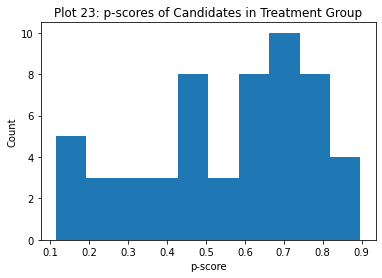

In [ ]:
plt.hist(treatment['p_score'])
plt.title('Plot 23: p-scores of Candidates in Treatment Group')
plt.xlabel('p-score')
plt.ylabel('Count');

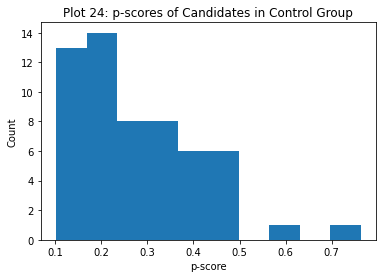

In [ ]:
plt.hist(control['p_score'])
plt.title('Plot 24: p-scores of Candidates in Control Group')
plt.xlabel('p-score')
plt.ylabel('Count');

In [ ]:
causal_temp

,index,Cand_Name,Cand_Office,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Net_Contribution,Party Support?,Net_Operating_Expenditure,Won Primary,treatment,p_score
5,7,"GOLDSTEIN, BEVERLY",1,1,1,-0.470564,-0.393993,0,-0.452422,1,1,0.674007
10,15,"SAREGA, ANDREW",1,1,0,-0.414662,-0.497135,0,-0.549704,0,0,0.203285
19,25,"LITTLE, PATRICK",0,1,1,-0.502352,-0.434742,0,-0.492241,0,0,0.183920
31,38,"POLCE, NICK",1,1,0,-0.423406,-0.418079,0,-0.456793,0,1,0.743819
41,48,"HAGEN, FOSTER",1,1,0,-0.502225,-0.433595,0,-0.488795,0,0,0.406651
...,...,...,...,...,...,...,...,...,...,...,...,...
879,508,"DAVIS, MELISSA",1,0,1,-0.464415,-0.472701,0,-0.437186,0,1,0.320056
881,510,"MCKELLAR, SHIRLEY",1,0,1,-0.516970,-0.461670,0,-0.498961,1,0,0.263038
885,515,"RAMSEY, GEORGE",1,0,1,-0.448583,-0.454520,0,-0.441004,0,1,0.504959
889,522,"GARCIA, ROEL",1,0,0,-0.487153,-0.525495,0,-0.484519,0,0,0.102116


In [ ]:
causal_temp_1 = causal[(causal['p_score'] >= 0.05) & (causal['p_score'] <= 0.95)]
treatment_1 = causal_temp_1[causal_temp_1['treatment'] == 1]
control_1 = causal_temp_1[causal_temp_1['treatment'] == 0]
ATE_1 = (np.sum(treatment_1['Won Primary']/treatment_1['p_score']) - np.sum(control_1['Won Primary']/(1-control_1['p_score'])))/len(causal_temp_1)
ATE_1

0.01190863745876211

In [ ]:
causal_temp_1

,index,Cand_Name,Cand_Office,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Net_Contribution,Party Support?,Net_Operating_Expenditure,Won Primary,treatment,p_score
5,7,"GOLDSTEIN, BEVERLY",1,1,1,-0.470564,-0.393993,0,-0.452422,1,1,0.674007
10,15,"SAREGA, ANDREW",1,1,0,-0.414662,-0.497135,0,-0.549704,0,0,0.203285
19,25,"LITTLE, PATRICK",0,1,1,-0.502352,-0.434742,0,-0.492241,0,0,0.183920
24,30,"BELL, BARRY",1,1,0,-0.534106,-0.488307,0,-0.530687,0,0,0.074746
31,38,"POLCE, NICK",1,1,0,-0.423406,-0.418079,0,-0.456793,0,1,0.743819
...,...,...,...,...,...,...,...,...,...,...,...,...
881,510,"MCKELLAR, SHIRLEY",1,0,1,-0.516970,-0.461670,0,-0.498961,1,0,0.263038
885,515,"RAMSEY, GEORGE",1,0,1,-0.448583,-0.454520,0,-0.441004,0,1,0.504959
889,522,"GARCIA, ROEL",1,0,0,-0.487153,-0.525495,0,-0.484519,0,0,0.102116
891,526,"ENOCH, VANESSA",1,0,1,-0.470122,-0.410737,0,-0.490409,1,0,0.762470


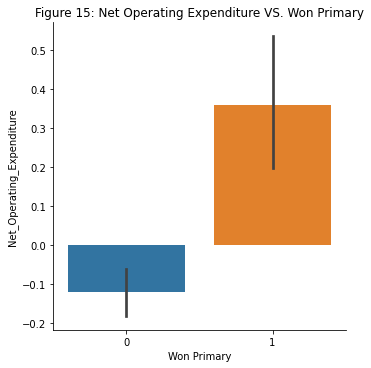

In [ ]:
sns.catplot(y="Net_Operating_Expenditure", x="Won Primary", kind="bar", data=causal).set(title='Figure 15: Net Operating Expenditure VS. Won Primary');

This plot depicts a very strong correlation between how much a candidate spent on campaign operation and whether they won the Primary. It suggests that candidates who spent more tended to win and candidates who spent little tended to lose. Thus, this motivated our causal research question of whether spending more on campaign operation helps a candidate to win in Primary.

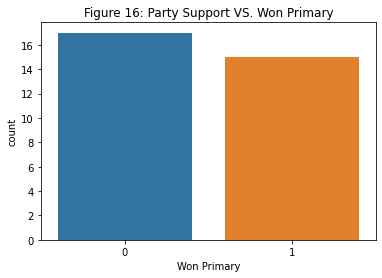

In [ ]:
party_support = causal[causal['Party Support?'] == 1]
sns.countplot(data=party_support, x='Won Primary').set(title='Figure 16: Party Support VS. Won Primary');

From the count plot, we can see that among candidates with party support, most of them won in Primary. 

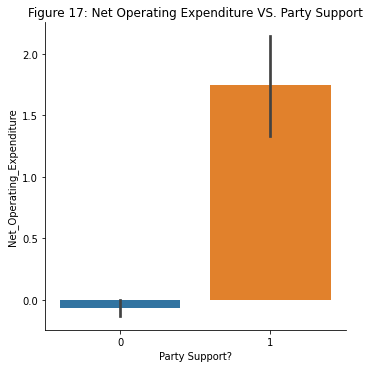

In [ ]:
sns.catplot(y="Net_Operating_Expenditure", x="Party Support?", kind="bar", data=causal).set(title='Figure 17: Net Operating Expenditure VS. Party Support');

This plot shows candidates with party support tended to spend a lot more on campaign operation than candidates without party support.

The two plots above indicate that whether a candidate received their party support has strong associations with both how much they spent and whether they won Primary. We believe Party Support is a confounder of this causal question because it seems reasonable that someone with party support has a better chance of winning and at receiving more funding and contributions.

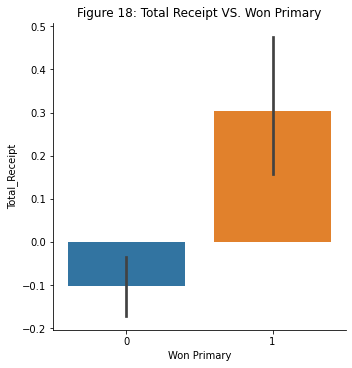

In [ ]:
sns.catplot(y="Total_Receipt", x="Won Primary", kind="bar", data=causal).set(title='Figure 18: Total Receipt VS. Won Primary');

From the plot above, we see that candidates who received a lot more money tended to win and candidates who received little tended to lose.

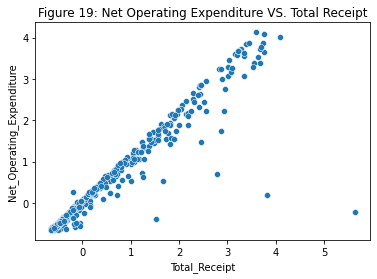

In [ ]:
sns.scatterplot(x='Total_Receipt', y='Net_Operating_Expenditure', data=causal).set(title='Figure 19: Net Operating Expenditure VS. Total Receipt');

This scatterplot expressed a pretty strong correlation between how much money a candidate received and how much they spent on campaign operation.

The two plots above convey that total money a candidate received seems to have strong effects on how much they spent on campaign operation and whether they won in Primary. We consider Total_Receipt a confounder because it seems to make sense that the more money a candidate received, the more they were able to spend and the more it helped them win.

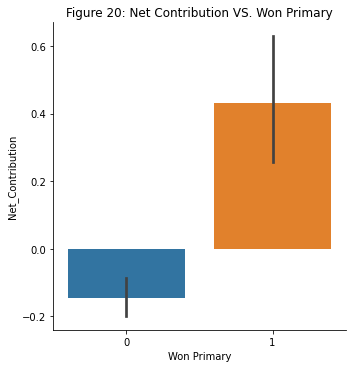

In [ ]:
sns.catplot(y="Net_Contribution", x="Won Primary", kind="bar", data=causal).set(title='Figure 20: Net Contribution VS. Won Primary');

This plot shows candidates who received more money from contributions from individuals, commitees, self, etc tended to win and candidates who received little tended to lose.

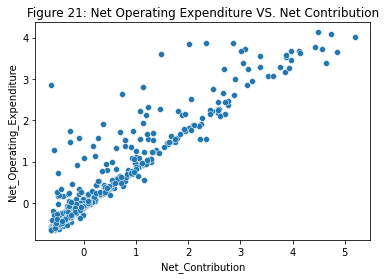

In [ ]:
sns.scatterplot(x='Net_Contribution', y='Net_Operating_Expenditure', data=causal).set(title='Figure 21: Net Operating Expenditure VS. Net Contribution');

This scatterplot depicts a pretty strong correlation between how much money a candidate received from contributions and how much they spent on campaign operation.

From the two plots above, we can see that Net Contribution has strong associations with both Net Operating Expenditure and Won Primary. We decided Net Contribution is a confounder because it seems reasonable that someone who received more money from contributions has a better chance at spending more on campaign operation and at winning.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f57288df-d8b0-428d-a2ea-1fe29f9c3036' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>